In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Data Visualization/data'

1.json	2.json	3.json	4.json	5.json


In [ ]:
import numpy as np
import cv2, zlib, base64, io
from PIL import Image
import json
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle

%matplotlib inline


In [ ]:
lineByLine = []
with open('/content/drive/My Drive/Data Visualization/data/1.json') as file:
    db = json.load(file)
    lineByLine.append(db)

for line in lineByLine:
    print(line[0],"\n",line[1],"\n",line[2])
    print(len(line[1]['value']['points']))

{'id': 'XJMOJPtwvU', 'type': 'choices', 'value': {'choices': ['PassengerSide']}, 'to_name': 'image', 'from_name': 'CarSide'} 
 {'id': 'Aq6nkgCbWc', 'type': 'polygonlabels', 'value': {'points': [[3.4166737705501578, 53.19465654365013], [5.256421185461781, 52.75703235958848], [7.818926513374399, 51.706734317840485], [9.724379193104296, 50.656436276092485], [11.038484489469742, 52.75703235958848], [12.352589785835185, 54.1574297485858], [15.177916173020892, 58.4461467523901], [13.338168758109267, 59.058820610076424], [11.3670108135611, 60.721792509510735], [10.118610782013926, 62.90991342981906], [9.33014760419466, 65.18555918693971], [9.33014760419466, 68.16140363855902], [9.461558133831202, 70.96219841655366], [5.519242244734871, 69.91190037480568], [4.336547478005969, 68.86160233305768], [3.6794948298232466, 66.2358572286877], [3.1538527112770685, 63.52258728750539], [2.431094798276074, 61.07189185676008], [1.8397474149116233, 58.35862191557776], [2.233979003821257, 55.90792648483245]]

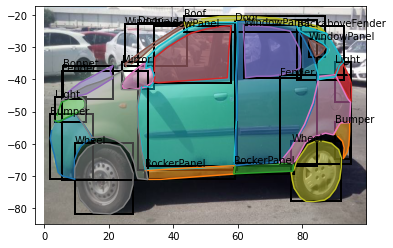

In [ ]:
for line in lineByLine:
  for i in range(1,len(line)):
    #creating rough closed curves
    xs = [x[0] for x in line[i]['value']['points']]
    ys = [x[1] for x in line[i]['value']['points']]
    ys1 = [y*(-1) for y in ys]
    plt.plot(xs,ys1)
    plt.fill(xs, ys1, alpha = 0.5)
    
    #creating rectangles
    rectangle = plt.Rectangle((min(xs),min(ys1)), (max(xs)-min(xs)), (max(ys1)-min(ys1)), fc = 'none',ec='black',linewidth = 2)
    plt.gca().add_patch(rectangle)
    plt.axis('scaled')
    plt.text(min(xs),max(ys1),line[i]['value']['polygonlabels'][0])
    plt.plot()
  
  #masking image
  img = plt.imread('/content/drive/My Drive/Data Visualization/images/1.jpg')
  plt.imshow(img, zorder=0, extent=[0, 100, -100, 0])
  plt.show()